# MINOR ASSIGNMENT - 3: NATURAL LANGUAGE PROCESSING
### Question 1
Define Natural Language Processing (NLP). Provide three real-world applications of NLP and explain how they impact society.

**Solution:**  
Natural Language Processing (NLP) is a field of artificial intelligence that enables computers to understand, interpret, and generate human language.  
  
Three real-world applications of NLP:  
1. **Chatbots and Virtual Assistants** (e.g., Siri, Alexa) - Enhances customer service.  
2. **Sentiment Analysis** - Helps businesses analyze customer feedback.  
3. **Machine Translation** (e.g., Google Translate) - Bridges language barriers.

### Question 2
Explain the following terms and their significance in NLP:
- **Tokenization:** Breaks down text into individual units (tokens) like words or phrases. This is the initial step for most NLP tasks, providing the basic building blocks for analysis.
- **Stemming:** Reduces words to their root form by removing suffixes, using rules. This simplifies words but may not always produce valid words. It's computationally efficient.
- **Lemmatization:** Reduces words to their dictionary base form (lemma), considering context and meaning. This provides accurate base words, improving accuracy in tasks needing semantic understanding, but is more computationally intensive.   

### Question 3
What is Part-of-Speech (POS) tagging? Discuss its importance with an example.

**Solution:**
POS tagging assigns grammatical labels (noun, verb, etc.) to words in a sentence. It's crucial for:  
  
- Disambiguation: Resolving word meaning ambiguity.  
- Syntactic analysis: Understanding sentence structure.  
- Information extraction: Identifying key information.  
- Machine translation: Ensuring accurate translation.

**Example:**  
Sentence 
"The quick brown fox jumps over the lazy dog  ."

### Question 4
Create a TextBlob named `exercise_blob` containing 'This is a TextBlob'

In [3]:
from textblob import TextBlob
exercise_blob = TextBlob("This is a TextBlob")
print(exercise_blob)

This is a TextBlob


### Question 5
Write a Python script to perform the following tasks on the given text:
- Tokenize the text into words and sentences.
- Perform stemming and lemmatization using NLTK or SpaCy.
- Remove stop words from the text.

Sample Text:
"Natural Language Processing enables machines to understand and process human languages. It is a fascinating field with numerous applications, such as chatbots and language translation."

In [5]:
from textblob import Word , TextBlob

Text=TextBlob("Natural Language Processing enable machines to understand and process human language. It is a fascinating field with numerous applications , such as chartboats and language translation.")
print(Text)
print(Text.words)
print(Text.sentences)

token2 = Text.words
for w in token2:
    print(w,":", w.stem())
print()
for w in token2:
    print(w,":", w.lemmatize())
from nltk.corpus import stopwords
stop = stopwords.words("english")
text_s = [i for i in token2 if i[0] not in stop]
print(text_s)

Natural Language Processing enable machines to understand and process human language. It is a fascinating field with numerous applications , such as chartboats and language translation.
['Natural', 'Language', 'Processing', 'enable', 'machines', 'to', 'understand', 'and', 'process', 'human', 'language', 'It', 'is', 'a', 'fascinating', 'field', 'with', 'numerous', 'applications', 'such', 'as', 'chartboats', 'and', 'language', 'translation']
[Sentence("Natural Language Processing enable machines to understand and process human language."), Sentence("It is a fascinating field with numerous applications , such as chartboats and language translation.")]
Natural : natur
Language : languag
Processing : process
enable : enabl
machines : machin
to : to
understand : understand
and : and
process : process
human : human
language : languag
It : it
is : is
a : a
fascinating : fascin
field : field
with : with
numerous : numer
applications : applic
such : such
as : as
chartboats : chartboat
and : and


### Question 6
Web Scraping with the Requests and Beautiful Soup Libraries:
- Use the **requests** library to download the www.python.org home page’s content.
- Use the **Beautiful Soup library** to extract only the text from the page.
- Eliminate the stop words in the resulting text, then use the wordcloud module to create a word cloud based on the text.

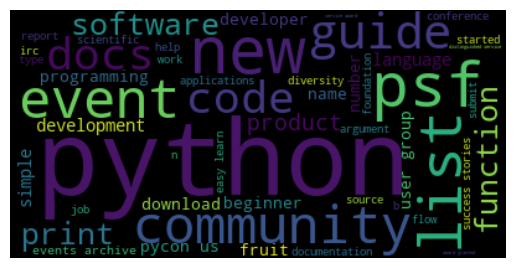

In [6]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

url = "https://www.python.org"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
text = soup.get_text(separator=" ", strip=True).lower()
words = [w for w in word_tokenize(text) if w.isalnum() and w not in stopwords.words("english")]
wordcloud = WordCloud().generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Question 7
(**Tokenizing Text and Noun Phrases**) Using the text from the previous problem, create a TextBlob, then tokenize it into Sentences and Words, and extract its noun phrases.

In [9]:
from textblob import TextBlob

blob = TextBlob(text)
print(blob.sentences)
print(blob.words)
print(blob.noun_phrases)

[Sentence("welcome to python.org notice: while javascript is not essential for this website, your interaction with the content will be limited."), Sentence("please turn javascript on for the full experience."), Sentence("skip to content ▼ close python psf docs pypi jobs community ▲ the python network donate ≡ menu search this site go a a smaller larger reset socialize linkedin mastodon chat on irc twitter about applications quotes getting started help python brochure downloads all releases source code windows macos other platforms license alternative implementations documentation docs audio/visual talks beginner's guide developer's guide faq non-english docs pep index python books python essays community diversity mailing lists irc forums psf annual impact report python conferences special interest groups python logo python wiki code of conduct community awards get involved shared stories success stories arts business education engineering government scientific software development new

### Question 8
(**Sentiment of a News Article**) Using the techniques in problem no. 5, download a web page for a current news article and create a TextBlob. Display the sentiment for the entire TextBlob and for each Sentence.

In [11]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

url = "https://www.bbc.com/news/world-us-canada-68641974" 
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
paragraphs = soup.find_all("p")
text = " ".join([p.get_text() for p in paragraphs])

blob = TextBlob(text)

print("Overall Sentiment:")
print(f"  Polarity: {blob.sentiment.polarity}")
print(f"  Subjectivity: {blob.sentiment.subjectivity}")

print("\nSentence Sentiments:")
for sentence in blob.sentences:
    print(f"  Sentence: {sentence}")
    print(f"    Polarity: {sentence.sentiment.polarity}")
    print(f"    Subjectivity: {sentence.sentiment.subjectivity}")

Overall Sentiment:
  Polarity: -0.0020833333333333376
  Subjectivity: 0.48263888888888884

Sentence Sentiments:
  Sentence: Ex-Marine Phil Jones says cold water swimming has been "a game-changer for me".
    Polarity: -0.6
    Subjectivity: 1.0
  Sentence: Max Verstappen says it "was not a mistake" that he liked a comment on social media that criticised Red Bull's decision to demote Liam Lawson.
    Polarity: 0.2111111111111111
    Subjectivity: 0.2888888888888889
  Sentence: The property group that bought the site says the investment in the project could create 1,700 jobs.
    Polarity: 0.0
    Subjectivity: 0.0
  Sentence: Thames Water engineers are at the scene on Mead Way in Swindon.
    Polarity: 0.0
    Subjectivity: 0.0
  Sentence: The roadworks in Manchester started in August with drivers complaining of "ridiculous" congestion.
    Polarity: -0.3333333333333333
    Subjectivity: 1.0
  Sentence: The impact of the tariffs will be huge, with significant changes to long-standing gl

### Question 9
(**Sentiment of a News Article with the NaiveBayesAnalyzer**) Repeat the previous exercise but use the NaiveBayesAnalyzer for sentiment analysis.

In [13]:
from textblob.sentiments import NaiveBayesAnalyzer

article_blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
for sentence in article_blob.sentences:
    print("Sentiment:",  sentence.sentiment)

Sentiment: Sentiment(classification='neg', p_pos=0.29803271584432245, p_neg=0.7019672841556771)
Sentiment: Sentiment(classification='pos', p_pos=0.6938738116585462, p_neg=0.3061261883414572)
Sentiment: Sentiment(classification='pos', p_pos=0.5909906380576642, p_neg=0.4090093619423347)
Sentiment: Sentiment(classification='neg', p_pos=0.25661979861524475, p_neg=0.7433802013847558)
Sentiment: Sentiment(classification='neg', p_pos=0.13116707778477477, p_neg=0.8688329222152248)
Sentiment: Sentiment(classification='pos', p_pos=0.9022917211340558, p_neg=0.09770827886594513)
Sentiment: Sentiment(classification='pos', p_pos=0.9377716959893131, p_neg=0.062228304010685534)
Sentiment: Sentiment(classification='pos', p_pos=0.9607682738532918, p_neg=0.039231726146709674)
Sentiment: Sentiment(classification='neg', p_pos=0.45102282810518063, p_neg=0.5489771718948215)
Sentiment: Sentiment(classification='pos', p_pos=0.7870370370370376, p_neg=0.21296296296296263)
Sentiment: Sentiment(classification='pos

### Question 10
(**Spell Check a Project Gutenberg Book**) Download a Project Gutenberg book and create a TextBlob. Tokenize the TextBlob into Words and determine whether any are misspelled. If so, display the possible corrections.

In [17]:
from textblob import TextBlob
import requests

url = 'https://www.gutenberg.org/files/236/236-0.txt'
r = requests.get(url)  # Assign request response first
txt, b, w = r.text, TextBlob(r.text), TextBlob(r.text).words  # Then use it

m = {wd: TextBlob(wd).correct() for wd in w[:200] if wd.lower() != TextBlob(wd).correct().lower()}
print("Misspelled Words and Corrections:" if m else "No misspellings found in checked portion.")

if m:
    for k, v in m.items():
        print(f"{k}: {v}")


Misspelled Words and Corrections:
Book: Took
Kipling: Filling
This: His
If: Of
Date: Late
Hunting-Song: Hunting-Long
Pack: Back
Kaa: A
Road-Song: Road-Long
Bandar-Log: Wander-Dog
Song: Long
Seal: Real
Rikki-Tikki-Tavi: Wiki-Wiki-Have
Darzee: Armee
Shiv: His
Grasshopper: Grasshoppers
Rann: Kann
Kite: Site


### Question 11

In [19]:
# Write a Python program that takes user input in English and translates it to French, Spanish, and German using TextBlob.
from googletrans import Translator

def translate_text():
    text = input("Enter a sentence in English: ")
    translator = Translator()
    
    french = translator.translate(text, dest='fr').text
    spanish = translator.translate(text, dest='es').text
    german = translator.translate(text, dest='de').text

    print(f"French: {french}")
    print(f"Spanish: {spanish}")
    print(f"German: {german}")

translate_text()

Enter a sentence in English:  Hello, how are you?


French: Bonjour comment allez-vous?
Spanish: ¿Hola, cómo estás?
German: Hallo, wie geht es dir?


In [28]:
# Create a program that takes multiple user-inputted sentences, analyzes polarity and subjectivity, and categorizes them as objective/subjective and positive/negative/neutral.
from textblob import TextBlob

def analyze_sentences():
    sentences = input("Enter multiple sentences separated by a period: ").split(".")
    for sentence in sentences:
        blob = TextBlob(sentence.strip())
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity

        sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
        objectivity = "Subjective" if subjectivity > 0.5 else "Objective"

        print(f"Sentence: {sentence.strip()}")
        print(f"Sentiment: {sentiment}, Subjectivity: {objectivity}\n")

analyze_sentences()

Enter multiple sentences separated by a period:  I love programming. The weather is bad today. This is an interesting book.


Sentence: I love programming
Sentiment: Positive, Subjectivity: Subjective

Sentence: The weather is bad today
Sentiment: Negative, Subjectivity: Subjective

Sentence: This is an interesting book
Sentiment: Positive, Subjectivity: Objective

Sentence: 
Sentiment: Neutral, Subjectivity: Objective



In [30]:
# Develop a function that takes a paragraph, splits it into sentences, and calculates the sentiment score for each sentence individually. 
def analyze_paragraph_sentiment():
    paragraph = input("Enter a paragraph: ")
    blob = TextBlob(paragraph)
    
    for sentence in blob.sentences:
        print(f"Sentence: {sentence}")
        print(f"Polarity: {sentence.sentiment.polarity}, Subjectivity: {sentence.sentiment.subjectivity}\n")

analyze_paragraph_sentiment()

Enter a paragraph:  The movie was fantastic. The seats were uncomfortable. The food was delicious.


Sentence: The movie was fantastic.
Polarity: 0.4, Subjectivity: 0.9

Sentence: The seats were uncomfortable.
Polarity: -0.5, Subjectivity: 1.0

Sentence: The food was delicious.
Polarity: 1.0, Subjectivity: 1.0



In [32]:
# Write a program that takes a sentence as input and prints each word along with its POS tag using TextBlob
def pos_tagging():
    sentence = input("Enter a sentence: ")
    blob = TextBlob(sentence)

    for word, tag in blob.tags:
        print(f"{word}: {tag}")

pos_tagging()

Enter a sentence:  The quick brown fox jumps over the lazy dog.


The: DT
quick: JJ
brown: NN
fox: NN
jumps: VBZ
over: IN
the: DT
lazy: JJ
dog: NN


In [54]:
# Create a function that takes a user-inputted word, checks its spelling using TextBlob, and sug gests top 3 closest words if a mistake is found.
def spell_check():
    word = input("Enter a word: ")
    blob = TextBlob(word)
    corrected = blob.correct()
    if word != corrected:
        suggestions = blob.words[0].spellcheck()[:3]
        print(f"'{word}' is misspelled. Suggestions: {suggestions}")
    else:
        print(f"'{word}' is spelled correctly.")

spell_check()

Enter a word:  speling


'speling' is misspelled. Suggestions: [('spelling', 1.0)]


In [48]:
# Build a Python script that extracts all adjectives from a given paragraph and prints them in order of occurrence
def extract_adjectives():
    paragraph = input("Enter a paragraph: ")
    blob = TextBlob(paragraph)
    adjectives = [word for word, tag in blob.tags if tag.startswith("JJ")]

    print("Adjectives in order:", adjectives)

extract_adjectives()

Enter a paragraph:  The bright sun shone over the vast blue ocean.


Adjectives in order: ['bright', 'vast', 'blue']


In [50]:
# Write a program that takes a news article as input and extracts the top 5 most common noun phrases as keywords.
from collections import Counter

def extract_keywords():
    article = input("Enter a news article: ")
    blob = TextBlob(article)
    noun_phrases = blob.noun_phrases

    most_common = Counter(noun_phrases).most_common(5)
    print("Top 5 keywords:", [phrase for phrase, count in most_common])

extract_keywords()

Enter a news article:  The new iPhone 15 Pro Max has an incredible camera. Many tech enthusiasts are excited about its release.


Top 5 keywords: ['new iphone', 'pro max', 'incredible camera', 'tech enthusiasts']


In [52]:
# Write a program that summarizes a given paragraph by keeping only the most informative sen tences, based on noun phrase frequency
def summarize_paragraph():
    paragraph = input("Enter a paragraph: ")
    blob = TextBlob(paragraph)
    noun_phrases = Counter(blob.noun_phrases)

    ranked_sentences = sorted(blob.sentences, key=lambda s: sum(noun_phrases[np] for np in s.noun_phrases), reverse=True)

    summary = " ".join(str(sent) for sent in ranked_sentences[:len(blob.sentences)//2])  # Keep top half
    print("Summary:\n", summary)

summarize_paragraph()

Enter a paragraph:  The new smartphone has an advanced AI-powered camera. The battery life is also improved significantly. However, the design remains the same as the previous model. Many users expected a new design, but they are happy with the software upgrades.


Summary:
 The new smartphone has an advanced AI-powered camera. Many users expected a new design, but they are happy with the software upgrades.


### Question 12
Write a Python program that takes a word as input and returns:
- Its definition
- Its synonyms
- Its antonyms (if available)

In [58]:
from textblob import Word

happy = Word('happy')
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [64]:
lemmas = happy.synsets[0].lemmas()
lemmas[0].antonyms()

[Lemma('unhappy.a.01.unhappy')]

In [66]:
 happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

### Question 13
- Write a Python program that reads a .txt file, processes the text, and generates a word cloud visualization.
- Create a word cloud in the shape of an object (e.g., a heart, star) using WordCloud and a mask image.

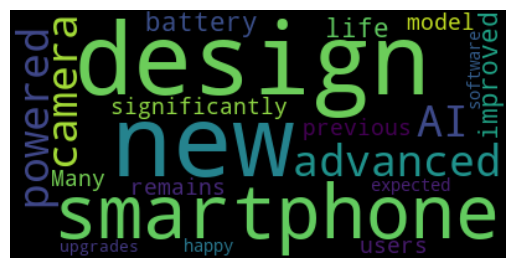

In [68]:
from wordcloud import WordCloud

text = "The new smartphone has an advanced AI-powered camera. The battery life is also improved significantly. However, the design remains the same as the previous model. Many users expected a new design, but they are happy with the software upgrades."
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# with masking:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, mask_image):
    mask = np.array(Image.open(mask_image))

    wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='black').generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud("The new smartphone has an advanced AI-powered camera. The battery life is also improved significantly. However, the design remains the same as the previous model. Many users expected a new design, but they are happy with the software upgrades.", 'heart.png')

### Question 14
(**Textatistic: Readability of News Articles**) Using the above techniques, download from several news sites current news articles on the same topic. Perform readability assessments on them to determine which sites are the most readable.
For each article, calculate the average number of words per sentence, the average number of characters per word, and the average number of syllables per word.

In [25]:
import requests
from bs4 import BeautifulSoup
import textstat
import re

def fetch_article(url):
    return re.sub(r'\s+', ' ', ' '.join(p.get_text() for p in BeautifulSoup(requests.get(url).text, 'html.parser').find_all('p')).strip())

def analyze_readability(text):
    s, w = textstat.sentence_count(text), textstat.lexicon_count(text, removepunct=True)
    return (w / s if s else 0, sum(len(word) for word in text.split()) / w if w else 0, textstat.syllable_count(text) / w if w else 0)

def main():
    for url in [
        'https://www.bbc.com/news/world-60525350',
        'https://www.nytimes.com/2023/05/01/world/economy/market-trends.html'
    ]:
        print(f"Analyzing: {url}")
        text = fetch_article(url)
        if text:
            wps, cpw, spw = analyze_readability(text)
            print(f"Words/Sentence: {wps:.2f}, Chars/Word: {cpw:.2f}, Syllables/Word: {spw:.2f}\n")
        else:
            print("Failed to extract article content.\n")

if __name__ == '__main__':
    main()

Analyzing: https://www.bbc.com/news/world-60525350
Words/Sentence: 16.61, Chars/Word: 4.77, Syllables/Word: 1.56

Analyzing: https://www.nytimes.com/2023/05/01/world/economy/market-trends.html
Words/Sentence: 8.00, Chars/Word: 4.50, Syllables/Word: 1.75



### Question 15
(**spaCy: Named Entity Recognition**) Using the above techniques, download a current news article, then use the spaCy library’s named entity recognition capabilities to display the named entities (people, places, organizations, etc.) in the article.

In [1]:
import requests, spacy
from bs4 import BeautifulSoup

def fetch_article(url):
    return ' '.join(p.get_text() for p in BeautifulSoup(requests.get(url).text, 'html.parser').find_all('p'))

def extract_entities(text):
    return [(ent.text, ent.label_) for ent in spacy.load('en_core_web_sm')(text).ents]

def main():
    urls = [
        'https://www.bbc.com/news/world-60525350',
        'https://www.nytimes.com/2023/05/01/world/economy/market-trends.html'
    ]
    for url in urls:
        print(f"Analyzing: {url}")
        text = fetch_article(url)
        print("Named Entities:")
        [print(f"{e} ({l})") for e, l in extract_entities(text)]

if __name__ == '__main__':
    main()

Analyzing: https://www.bbc.com/news/world-60525350
Named Entities:
Kremlin (ORG)
Putin (PERSON)
Trump (ORG)
US (GPE)
Russian (NORP)
Ukraine (GPE)
UK (GPE)
Paris (GPE)
Ukrainians (NORP)
Ukrainian (NORP)
European (NORP)
Paris (GPE)
Kremlin (ORG)
Putin (PERSON)
Trump (ORG)
US (GPE)
Russian (NORP)
Ukraine (GPE)
21 (CARDINAL)
Kyiv (GPE)
UK (GPE)
Paris (GPE)
Russian (NORP)
US (GPE)
Germany (GPE)
days (DATE)
US (GPE)
Saudi Arabia (GPE)
US (GPE)
Saudi Arabia (GPE)
Ukraine (GPE)
Sunday (DATE)
Russia (GPE)
Monday (DATE)
Ukraine (GPE)
the Black Sea (LOC)
Russian (NORP)
two-hour (TIME)
Donald Trump (PERSON)
Kariakin (PERSON)
Russia (GPE)
last week (DATE)
Ukrainian (NORP)
Karol Swiacki (PERSON)
BBC (ORG)
Kryvyi Rih (GPE)
four (CARDINAL)
Russia (GPE)
Ukraine (GPE)
three years (DATE)
Donald Trump (PERSON)
Victoria (GPE)
Vitaly (PERSON)
James (PERSON)
Trump 2.0 (PERSON)
Zelensky (PERSON)
Putin (PERSON)
Kirill Dmitriev (PERSON)
Russian (NORP)
Washington (GPE)
Anna Pinchuk (PERSON)
UK (GPE)
four (CARDIN

### Question 16
(**spaCy: Shakespeare Similarity Detection**) Using the spaCy techniques, download a Shakespeare comedy from Project Gutenberg and compare it for similarity with Romeo and Juliet.

In [3]:
import requests, re, spacy

def fetch_text(url):
    return re.sub(r'\s+', ' ', requests.get(url).text.strip())

def compare_similarity(text1, text2):
    nlp = spacy.load('en_core_web_sm')
    return nlp(text1).similarity(nlp(text2))

def main():
    romeo_juliet_url = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt'
    comedy_url = 'https://www.gutenberg.org/cache/epub/2238/pg2238.txt'  # As You Like It

    rj_text = fetch_text(romeo_juliet_url)
    comedy_text = fetch_text(comedy_url)

    print("Comparing Shakespeare Plays:")
    print(f"Similarity: {compare_similarity(rj_text, comedy_text):.2f}")

if __name__ == '__main__':
    main()

Comparing Shakespeare Plays:
Similarity: 0.93


C:\Users\hp\AppData\Local\Temp\ipykernel_16064\4276928383.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return nlp(text1).similarity(nlp(text2))


### Question 17
(**textblob.utils Utility Functions**) Use `strip_punc` and `lowerstrip` functions of TextBlob’s `textblob.utils` module with `all=True` keyword argument to remove punctuation and to get a string in all lowercase letters with whitespace and punctuation removed. Experiment with each function on Romeo and Juliet.

In [5]:
import requests
from textblob.utils import strip_punc, lowerstrip

def fetch_text(url):
    return requests.get(url).text

def process_text(text):
    print("Original (First 300 chars):", text[:300])
    print("\nWithout Punctuation:", strip_punc(text, all=True)[:300])
    print("\nLowercase & No Punctuation:", lowerstrip(text, all=True)[:300])

def main():
    url = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt'
    text = fetch_text(url)
    process_text(text)

if __name__ == '__main__':
    main()

Original (First 300 chars): ﻿The Project Gutenberg eBook of Romeo and Juliet
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg Li

Without Punctuation: ﻿The Project Gutenberg eBook of Romeo and Juliet
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever You may copy it give it away or reuse it under the terms
of the Project Gutenberg Licen

Lowercase & No Punctuation: ﻿the project gutenberg ebook of romeo and juliet
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever you may copy it give it away or reuse it under the terms
of the project gutenberg licen
